In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import gemmi
from typing import List


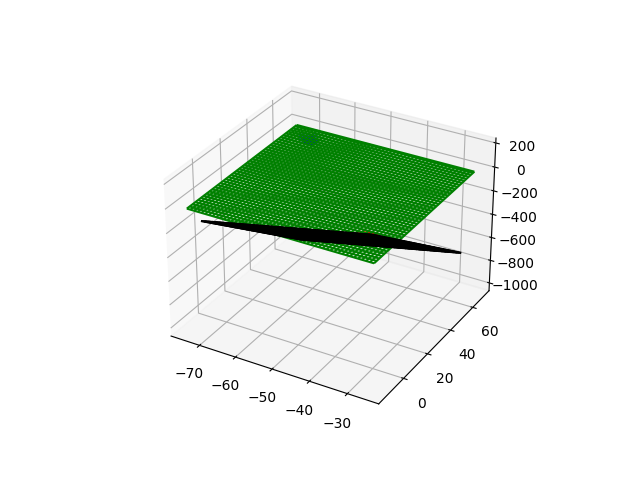

In [1]:
%matplotlib widget 

from align_bases import * 
import gemmi 
import matplotlib.pyplot as plt

structure = gemmi.read_structure("data/pdb_files/pdb1ais.ent")
residue = structure[0][0][0]

# get_base_plane(residue=residue)
plane, position_list = get_base_plane(residue=residue)
A,B,C,D = plane
rot_mat = get_rotation_matrix(plane)

transformed_positions = [np.array(rot_mat.dot(x))[0] for x in position_list]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(*zip(*position_list), c='red')
ax.scatter(*zip(*transformed_positions), c='blue')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                np.arange(ylim[0], ylim[1]))
Z = np.zeros(X.shape)
for r in range(X.shape[0]):
    for c in range(X.shape[1]):
        Z[r,c] = (D - X[r,c]*A - Y[r,c]*B)/C
ax.plot_wireframe(X,Y,Z, color='k')


# tx = transformed_positions[:3]
    
# BA = tx[1] - tx[0]
# CA = tx[2] - tx[0]

# cross = np.cross(BA, CA)
# d = tx[0][0]*cross[0] + tx[0][1]*cross[1] + tx[0][2]*cross[2]

# xlim = ax.get_xlim()
# ylim = ax.get_ylim()
# X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
#                 np.arange(ylim[0], ylim[1]))
# Z = np.zeros(X.shape)
# for r in range(X.shape[0]):
#     for c in range(X.shape[1]):
#         Z[r,c] = (d - X[r,c]*cross[0] - Y[r,c]*cross[1])/cross[2]
# ax.plot_wireframe(X,Y,Z, color='green')


# print(transformed_positions)

plt.show()
 

In [ ]:
from align_bases import get_arrays

array, rotarray = get_arrays()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_aspect('equal')

grid_spacing = 0.7


X,Y,Z = np.meshgrid(
    np.arange(array.shape[0]),
    np.arange(array.shape[1]),
    np.arange(array.shape[2]),
)

ax.scatter(X, Y, Z, c=array)

plt.show()

# ax.scatter()



In [ ]:
%matplotlib widget 
structure = gemmi.read_structure("data/pdb_files/pdb1ais.ent")

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_aspect('equal')

for chain in structure[0]:
    for residue in chain: 

        base_atoms = [
                "C1",
                "C2",
                "C3",
                "C4",
                "C5",
                "C6",
                "C7",
                "C8",
                "N1",
                "N2",
                "N3",
                "N4",
                "N5",
                "N6",
                "N7",
                "N8",
                "N9",
                "O2",
                "O4",
                "O6"]
            
        position_list: List[np.array] = []

        for atom in residue: 
            if atom.name in base_atoms: 
                position_list.append(np.array(atom.pos.tolist()))
                
        
        # points = np.random.choice(len(position_list)-1, 3)
        x = position_list[:3]
        BA = x[1] - x[0]
        CA = x[2] - x[0]
        
        cross = np.cross(BA, CA)
        # cross =cross / np.linalg.norm(X)
        print("cross", cross)
        print(x)
        d = x[0][0]*cross[0] + x[0][1]*cross[1] + x[0][2]*cross[2]
        print(d)
        
        # break
        
        # x,y,z = zip(*position_list)
        ax.scatter(*zip(*position_list))
        # tmp_A = []
        # tmp_B = []

        # for position in position_list:
        #     tmp_A.append([position[0], position[1], 1])
        #     tmp_B.append(position[2])
            
        # A = np.matrix(tmp_A)
        # B = np.matrix(tmp_B).T

        # fit = (A.T * A).I * A.T * B
        
        # xspace = np.linspace(-10, 10, 100)
        # yspace = np.linspace(-10, 10, 100)       
        # xspace, yspace = np.meshgrid(xspace, yspace)
        
        # zspace = (-d - (X[0]*xspace) - (X[1]*yspace)) / X[2]
        # surf = ax.plot_surface(xspace, yspace, zspace)

        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                        np.arange(ylim[0], ylim[1]))
        Z = np.zeros(X.shape)
        for r in range(X.shape[0]):
            for c in range(X.shape[1]):
                Z[r,c] = (d - X[r,c]*cross[0] - Y[r,c]*cross[1])/cross[2]
                print(r, c, X[r,c])
        ax.plot_wireframe(X,Y,Z, color='k')

        
        # xlim = ax.get_xlim()
        # ylim = ax.get_ylim()
        # X_,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
        #                 np.arange(ylim[0], ylim[1]))
        # Z = np.zeros(X_.shape)
        # for r in range(X_.shape[0]):
        #     for c in range(X_.shape[1]):
        #         Z[r,c] = X[0] * X_[r,c] + X[1] * Y[r,c] + d
        # ax.plot_wireframe(X_,Y,Z, color='k')

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        break
    break

plt.show()


In [ ]:
%matplotlib widget 
structure = gemmi.read_structure("data/pdb_files/pdb1ais.ent")

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_aspect('equal')

for chain in structure[0]:
    for residue in chain: 

        base_atoms = [
                "C1",
                "C2",
                "C3",
                "C4",
                "C5",
                "C6",
                "C7",
                "C8",
                "N1",
                "N2",
                "N3",
                "N4",
                "N5",
                "N6",
                "N7",
                "N8",
                "N9",
                "O2",
                "O4",
                "O6"]
            
        position_list: List[List[float]] = []
    
        for atom in residue: 
            if atom.name in base_atoms: 
                position_list.append(atom.pos.tolist())
                
        tmp_A = []
        tmp_B = []
        
        for position in position_list[:3]:
            tmp_A.append([position[0], position[1], 1])
            tmp_B.append(position[2])
            
        A = np.matrix(tmp_A)
        B = np.matrix(tmp_B).T
        
        fit = (A.T * A).I * A.T * B
        
        print("POS LIST" , position_list[:3])
        x = np.array(fit.T)[0]
        
        ax.scatter(*zip(*position_list))
        samp_coord = position_list[0]

        
        d = -(x[0]*samp_coord[0] + x[1]*samp_coord[1] - x[2]*samp_coord[2])
        
        # w = [-30.916, -5.869, 85.493]
        # d = x[0][0]*w[0] + x[0][1]*w[1] + x[0][2]*w[2]
        
        print(x, d)
        
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
                        np.arange(ylim[0], ylim[1]))
        Z = np.zeros(X.shape)
        for r in range(X.shape[0]):
            for c in range(X.shape[1]):
                Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
                print(r, c, X[r,c])
        ax.plot_wireframe(X,Y,Z, color='k')

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')
        break
    break

plt.show()
